In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

wine_dataset = load_wine()
wine_dataset.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [2]:
x_train, x_valid, y_train, y_valid = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=17)
print(x_train.shape)


(133, 13)


In [3]:
dtc = DecisionTreeClassifier()

In [4]:
dtc_model = dtc.fit(x_train, y_train)

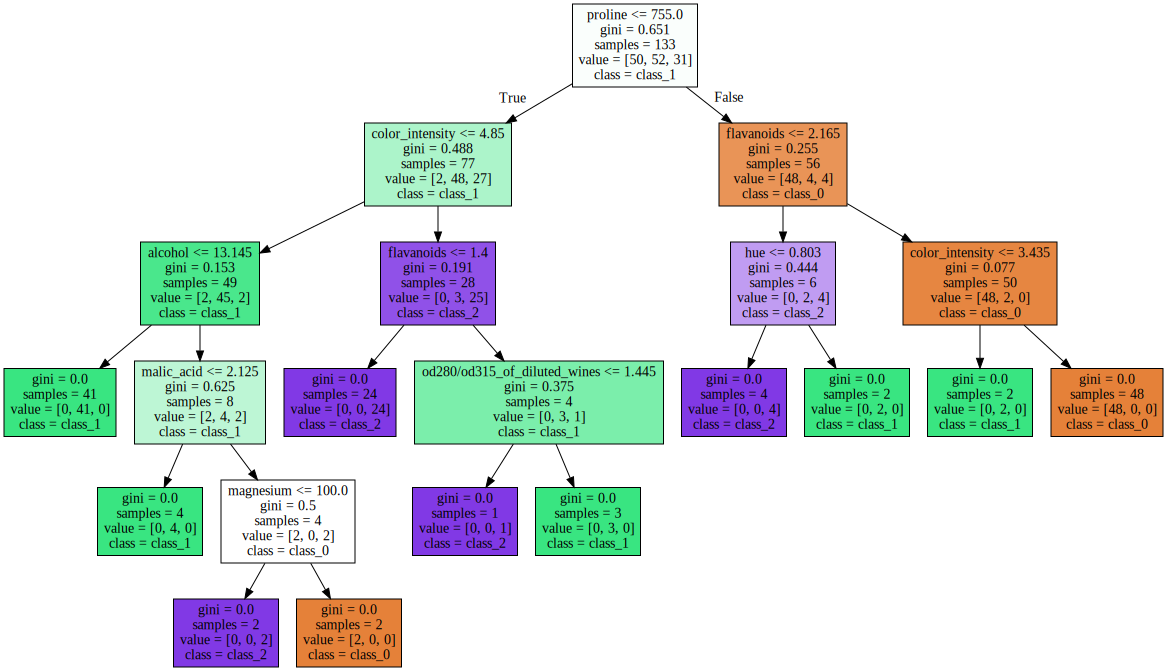

In [5]:
from sklearn import tree
import graphviz

def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=wine_dataset.feature_names,  
                                    class_names=wine_dataset.target_names,  
                                    filled=True)  
    return graphviz.Source(dot_data)  

print_graph(dtc_model)


In [6]:
dtc_predict = dtc_model.predict(x_valid)

In [8]:
dtc_model.score(x_valid, y_valid)


0.9333333333333333

In [14]:
dtc_1 = DecisionTreeClassifier(max_features=2, random_state=17)
dtc_1_model = dtc_1.fit(x_train, y_train)

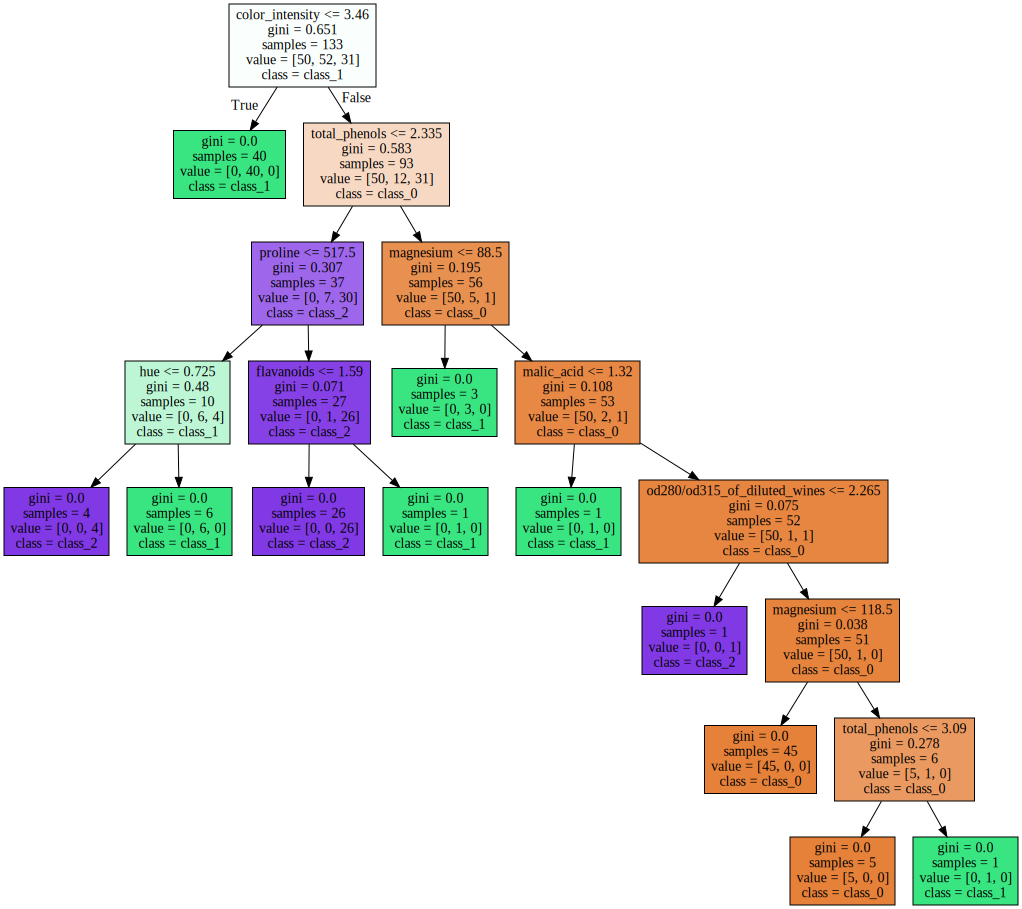

In [15]:
def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=wine_dataset.feature_names,  
                                    class_names=wine_dataset.target_names,  
                                    filled=True)  
    return graphviz.Source(dot_data)  

print_graph(dtc_1_model)

from sklearn.model_selection import GridSearchCV, cross_val_score
tree_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}
GridSearchCV(dtc_1_model, tree_params, cv=5)

In [35]:
from sklearn.model_selection import GridSearchCV, cross_val_score
dtc_2 = DecisionTreeClassifier()
tree_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)
               }
tree_grid_model = GridSearchCV(dtc_2, tree_params, cv=5)

In [36]:
tree_grid_model.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 6),
                         'max_features': range(1, 10)})

In [38]:
tree_grid_model.best_params_

{'max_depth': 3, 'max_features': 9}

In [39]:
tree_predict = tree_grid_model.predict(x_valid)
tree_predict

array([1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       2])

In [40]:
accuracy = tree_grid_model.score(x_valid, y_valid)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9777777777777777
